# Program to Predict Employee Attrition using Logistic Regression

# problem statement

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. 

How does Attrition affect companies?
Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.






In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
#Loading Data
df=pd.read_csv("HR_Analytics_Project.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Basis Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape #no.of rows and columns

(1470, 35)

In [6]:
#Column Names
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#Types of Attributes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Finding null values

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA

In [9]:
#column Business travel
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

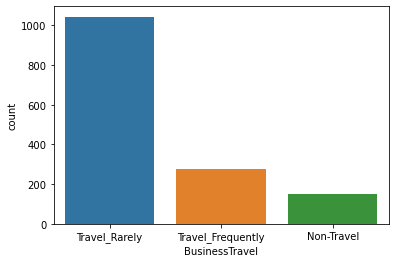

In [10]:
import seaborn as sns
sns.countplot(x="BusinessTravel",data=df)

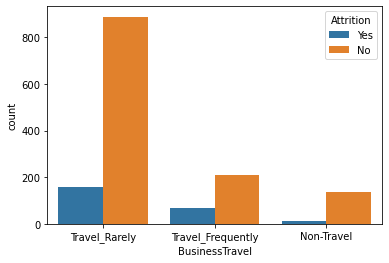

In [11]:
#comparing BusinessTravel and Attrition
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="BusinessTravel",data=df,hue="Attrition")
plt.show()


In [12]:
#column Department
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

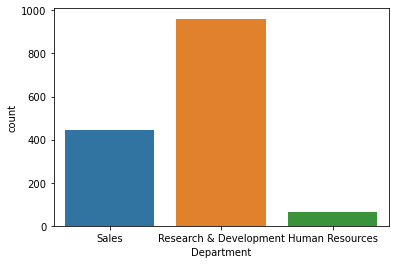

In [13]:
import seaborn as sns
sns.countplot(x="Department",data=df)

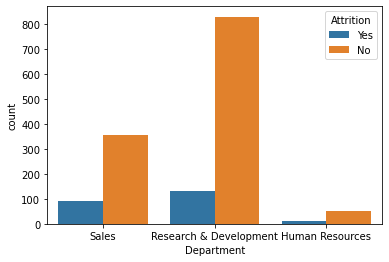

In [14]:
#comparing Departmentl and Attrition
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Department",data=df,hue="Attrition")
plt.show()


Attrition is higher in all 3 catagories.so column "Department" doesnt have any effect on Attrition. so droping is recommended

In [15]:
#column EducationField
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

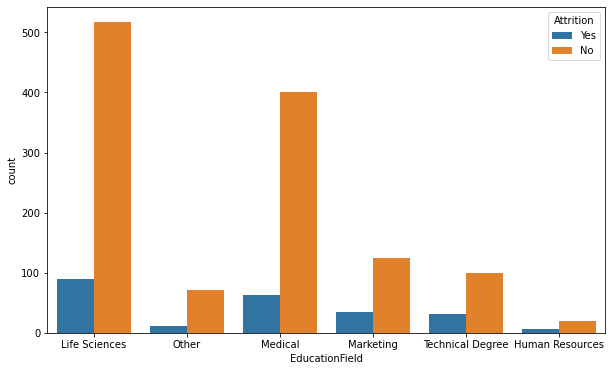

In [16]:
#comparing EducationField and Attrition
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x="EducationField",data=df,hue="Attrition")
plt.show()


Attrition is higher in all catagories.so column "EducationField" doesnt have any effect on Attrition.so Droping column is recommended

In [17]:
#column Gender
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

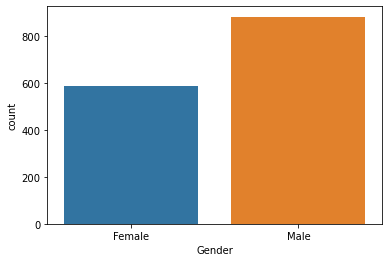

In [18]:
import seaborn as sns
sns.countplot(x="Gender",data=df)

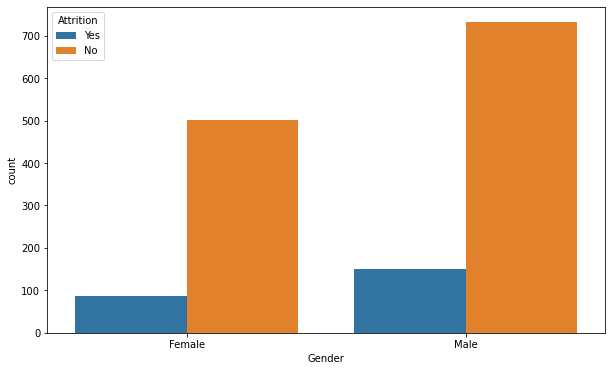

In [19]:
#comparing Gender and Attrition
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x="Gender",data=df,hue="Attrition")
plt.show()


The Gender column shows that attrition is higher in both Male and Female. it doesnt have a relation for an employee to leave company of Attrition.so Dropping the column is recommended

In [20]:
#column JobRole
df["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

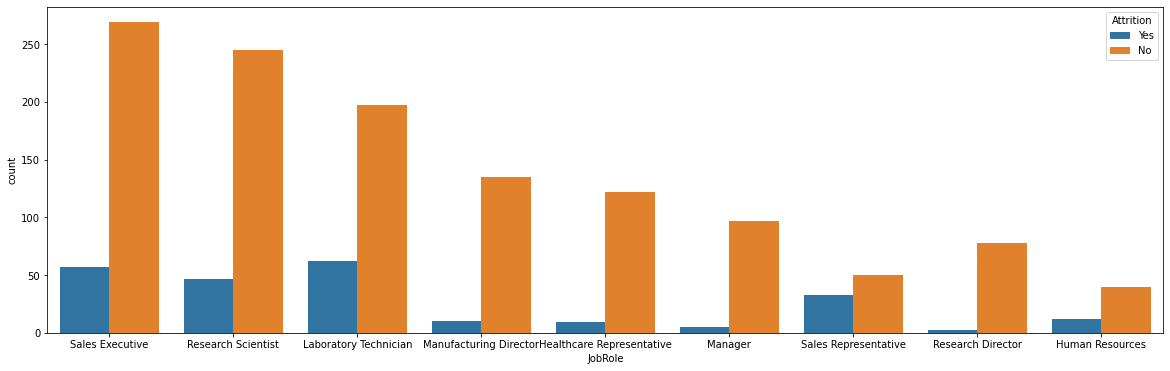

In [21]:
#comparing JobRole and Attrition
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.countplot(x="JobRole",data=df,hue="Attrition")
plt.show()


Column Jobrole doesnt have any relation with the target attribute 

In [22]:
#column MaritalStatus
df["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

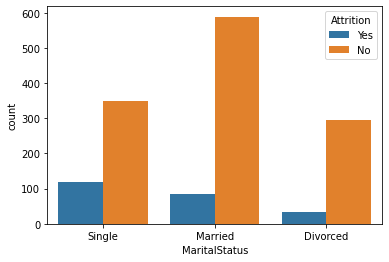

In [23]:
#comparing MaritalStatus and Attrition
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="MaritalStatus",data=df,hue="Attrition")
plt.show()


In MaritalStatus column the Attrition is mixed upon one another.

In [24]:
#column OverTime
df["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

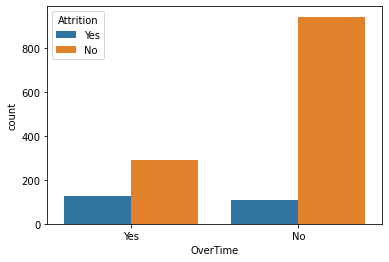

In [25]:
#comparing OverTime and Attrition
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="OverTime",data=df,hue="Attrition")
plt.show()


In column "overtime" attrition is more for employee who is working Overtime  

In [26]:
#column MaritalStatus
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

columnn "Over18" has only one value throughout the dataset so it will not help us in any way

so lets drop

In [27]:
df["StandardHours"].value_counts()


80    1470
Name: StandardHours, dtype: int64

this columnn has only one value throughout the dataset so it will not help us in any way 

so lets drop

# DATA CLEANING

From all the observation we can conclude columns like

1)BusinessTravel

2)Department

3)EducationField

4)Gender

5)JobRole

6)Overtime

7)Over18

8)StandardHours

9)EmployeeCount

doesnt have any relation to target "attrition" and dropping will not affect the dataset much

In [28]:
#Dropping Columns
df.drop(columns=["BusinessTravel","EmployeeCount","Department","EducationField","Gender","JobRole","OverTime","Over18","StandardHours"],inplace=True)

In [29]:
#Converting attribute MartialStatus from object to numeric
df["MaritalStatus"]=df["MaritalStatus"].map({"Single":0,"Married":1,"Divorced":2}).astype(int)

In [30]:
#Converting target-"Attrition" from object to numeric
df["Attrition"]=df["Attrition"].map({"No":0,"Yes":1}).astype(int)

In [31]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


1)Here we find that the mean is higher than median in most of the columns

If the mean is higher than the median, the distribution is positively skewed.

2)the maximum and the 75% has a normally distributed within most of the attributes 

From 1) and 2) we infer that we may have few outliers in some of the attributes and skewness



In [32]:
cor=df.corr()
cor

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


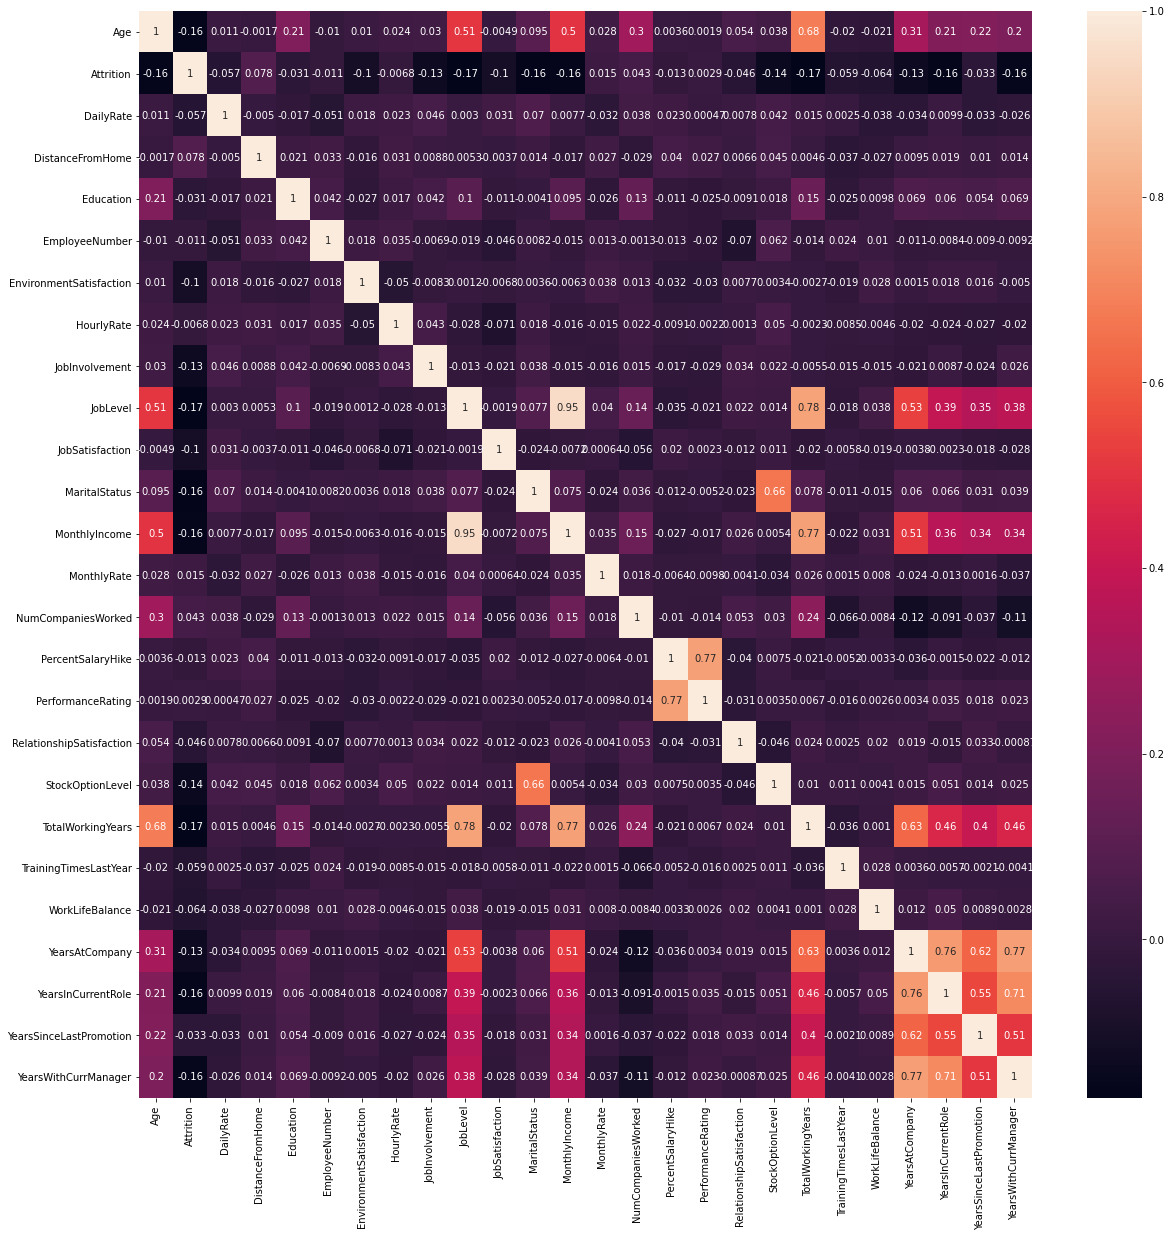

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap((cor),annot=True)

# Data Cleaning

# plotting Outliers

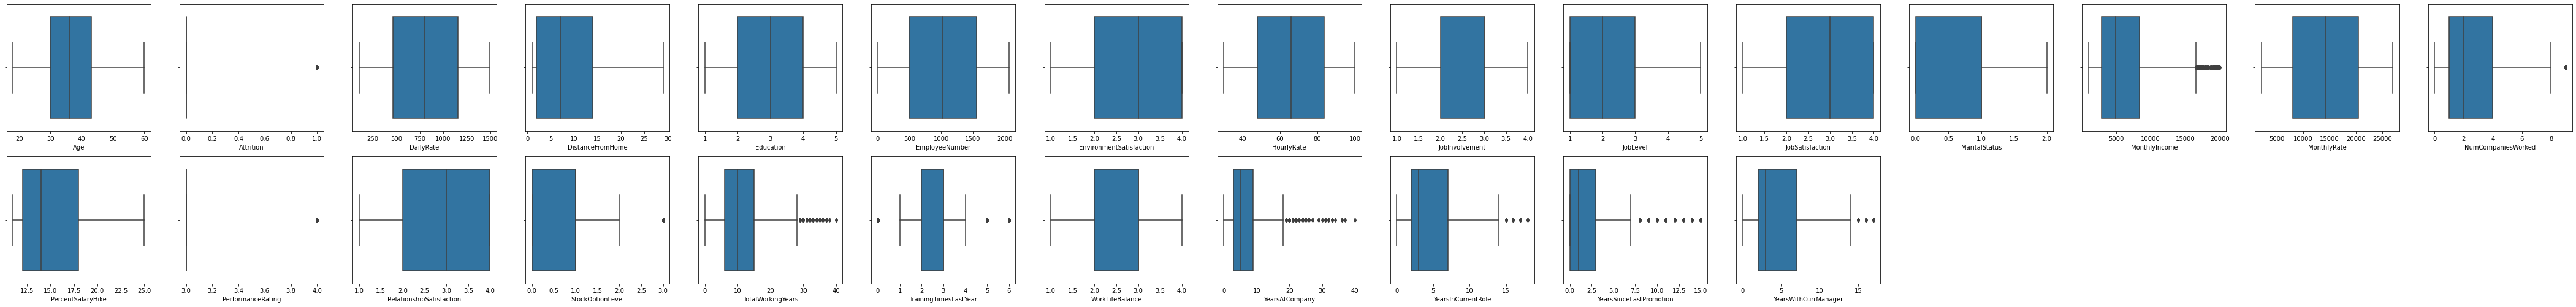

In [34]:
collist=df.columns.values
ncol=15
nrow=10
plt.figure(figsize=(5*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]])



In [35]:
#Removing Outliers
#Using Z-Score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1470, 26)

In [36]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([25, 24, 22, 24, 23, 24, 19, 19, 22, 24, 23, 24, 25, 19, 22, 24, 25,
       24, 19, 25, 22, 23, 24, 23, 25, 22, 24, 19, 22, 23, 24, 24, 25, 19,
       22, 22, 24, 24, 19, 23, 22, 22, 24, 22, 25, 24, 22, 19, 22, 24, 25,
       19, 25, 22, 24, 

In [37]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(1387, 26)

In [38]:
loss_percentage=(1470-1387)/1470*100
loss_percentage

5.646258503401361

# Finding Skewness

In [39]:
df_new.skew()

Age                         0.472280
Attrition                   1.805983
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MaritalStatus               0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

Total count of numeric features:  26

count of features which are significantly skewed:  16

# Seperating Target Variable

In [40]:
x_l=df_new.drop(["Attrition"],axis=1)
y=df_new["Attrition"]

In [41]:
#Skewness treatment
#treating using log
threshold=0.5
import numpy as np
for i in x_l.columns:
    if x_l.skew().loc[i]>0.5:
        x_l[i]=np.log1p(x_l[i])
    

In [42]:
#now Re-check skewness
x_l.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.031570
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobSatisfaction            -0.345612
MaritalStatus               0.160952
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
YearsWithCurrManager       -0.347018
dtype: float64

# Scaling input variables

 Algorithms requires all features to be on common scale. 

In [43]:
#using StandardScaler techinique
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x


array([[ 0.5366811 ,  0.73432467, -1.50208611, ...,  0.37256681,
        -0.96408623,  0.62864663],
       [ 1.44211114, -1.30776866,  0.25388551, ...,  0.98090913,
        -0.02809563,  0.99384363],
       [ 0.08396607,  1.40675151, -1.02871604, ..., -1.7105856 ,
        -0.96408623, -1.64589615],
       ...,
       [-1.04782149, -1.61544736, -0.43234028, ..., -0.28861286,
        -0.96408623,  0.11393037],
       [ 1.44211114,  0.53830356, -1.02871604, ...,  0.80807473,
        -0.96408623,  1.14336289],
       [-0.2555702 , -0.44180199,  0.25388551, ...,  0.08374422,
        -0.02809563, -0.25126663]])

# Best Algorithms for Data Prediction

Since the target has only 2 variable we use Binary Classification methods 

1)Logical Regression

2)Support vector machine(SVR)

3)k nearest neighbour



# 1)Logical Regression

In [44]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    if round(accuracy_score(y_train,lr_train_pred)*100,1)==round(accuracy_score(y_test,lr_test_pred)*100,1):
        print("At Random State ",i,"The model performing well")
        print("At Random State ",i)
        print("Training Accuracy score is ", accuracy_score(y_train,lr_train_pred)*100)
        print("Testing Accuracy Score is ",accuracy_score(y_test,lr_test_pred)*100)

At Random State  19 The model performing well
At Random State  19
Training Accuracy score is  86.29395852119026
Testing Accuracy Score is  86.33093525179856
At Random State  50 The model performing well
At Random State  50
Training Accuracy score is  86.29395852119026
Testing Accuracy Score is  86.33093525179856
At Random State  91 The model performing well
At Random State  91
Training Accuracy score is  86.74481514878268
Testing Accuracy Score is  86.6906474820144


At random_state=91 the model is performing well

In [46]:
#classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=91,test_size=.20)
print(classification_report(y_test,lr_test_pred))
print("\nf1 score is : ",f1_score(y_test,lr_test_pred))
print("\nAUC ROC Score: ",roc_auc_score(y_test,lr_test_pred))



              precision    recall  f1-score   support

           0       0.87      0.94      0.90       241
           1       0.17      0.08      0.11        37

    accuracy                           0.82       278
   macro avg       0.52      0.51      0.51       278
weighted avg       0.78      0.82      0.80       278


f1 score is :  0.1090909090909091

AUC ROC Score:  0.5094202085903331


In [47]:
#cross value score of Logistic Regression
lr_test_pred=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lr_accu=accuracy_score(y_test,lr_test_pred)
for i in range(2,10):
    lr_cr=cross_val_score(lr,x,y,cv=i)
    lrc=lr_cr.mean()
    print("At cv : ",i,"\ncross val score is : ",lrc*100,"\naccuracy score is: ",lr_accu*100)
    print("\n\n")


At cv :  2 
cross val score is :  84.64388637299301 
accuracy score is:  87.76978417266187



At cv :  3 
cross val score is :  84.85939306673647 
accuracy score is:  87.76978417266187



At cv :  4 
cross val score is :  85.6528293714914 
accuracy score is:  87.76978417266187



At cv :  5 
cross val score is :  85.43697893670623 
accuracy score is:  87.76978417266187



At cv :  6 
cross val score is :  85.72485943175597 
accuracy score is:  87.76978417266187



At cv :  7 
cross val score is :  86.01267520865512 
accuracy score is:  87.76978417266187



At cv :  8 
cross val score is :  85.94237924390406 
accuracy score is:  87.76978417266187



At cv :  9 
cross val score is :  85.8688265139878 
accuracy score is:  87.76978417266187





# 2)Support vector Machine(SVC)

In [48]:
#Hyerparameter tuning for SVM 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters={"kernel":["linear","poly","rbf","sigmoid"],"gamma":["scale","auto"]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'gamma': 'auto', 'kernel': 'rbf'}


In [49]:
#finding best random state for prediction
from sklearn.svm import SVC
svc=SVC(kernel="rbf",gamma="scale")
for i in range(1,500):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    svc.fit(x_train,y_train)
    svc_train=svc.predict(x_train)
    svc_pred=svc.predict(x_test)
    if round(accuracy_score(y_train,svc_train)*100,1)==round(accuracy_score(y_test,svc_pred)*100,1):
        print("At Random state ", i ,"the model is performing well")
        print("At Random state : ",i)
        print("Training r2 score is :",accuracy_score(y_train,svc_train)*100)
        print("Testing r2 score is :",accuracy_score(y_test,svc_pred)*100)


At Random state  56 the model is performing well
At Random state :  56
Training r2 score is : 87.8268710550045
Testing r2 score is : 87.76978417266187
At Random state  340 the model is performing well
At Random state :  340
Training r2 score is : 88.09738503155997
Testing r2 score is : 88.12949640287769


At random_state 340 the model is performing well

In [50]:
svc=SVC(kernel="rbf",gamma="scale")
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=340,test_size=0.20)
svc.fit(x_train,y_train)
svc_train=svc.predict(x_train)
svc_pred=svc.predict(x_test)
print(" Accuracy score is :",accuracy_score(y_test,svc_pred)*100)

 Accuracy score is : 88.12949640287769


In [51]:
#classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=340,test_size=.20)
print(classification_report(y_test,svc_pred))
print("\nf1 score is : ",f1_score(y_test,svc_pred))
print("\nAUC ROC Score: ",roc_auc_score(y_test,svc_pred))



              precision    recall  f1-score   support

           0       0.90      0.98      0.94       244
           1       0.54      0.21      0.30        34

    accuracy                           0.88       278
   macro avg       0.72      0.59      0.62       278
weighted avg       0.85      0.88      0.86       278


f1 score is :  0.2978723404255319

AUC ROC Score:  0.590646094503375


In [52]:
#cross value score of Support vector Machine(SVC)
svc_pred=svc.predict(x_test)
from sklearn.model_selection import cross_val_score
svc_accu=accuracy_score(y_test,svc_pred)
for i in range(2,10):
    svc_cr=cross_val_score(svc,x,y,cv=i)
    svcc=svc_cr.mean()
    print("At cv : ",i,"\ncross val score is : ",svcc*100,"\naccuracy score is: ",svc_accu*100)
    print("\n\n")


At cv :  2 
cross val score is :  84.6431586345131 
accuracy score is:  88.12949640287769



At cv :  3 
cross val score is :  84.78739882627572 
accuracy score is:  88.12949640287769



At cv :  4 
cross val score is :  84.57130482583999 
accuracy score is:  88.12949640287769



At cv :  5 
cross val score is :  84.86014076825184 
accuracy score is:  88.12949640287769



At cv :  6 
cross val score is :  84.57201323580635 
accuracy score is:  88.12949640287769



At cv :  7 
cross val score is :  84.64363665368691 
accuracy score is:  88.12949640287769



At cv :  8 
cross val score is :  84.13934290080394 
accuracy score is:  88.12949640287769



At cv :  9 
cross val score is :  84.93227202904623 
accuracy score is:  88.12949640287769





# 3) K Nearest Neighbour

In [53]:
#Hyerparameter tuning for KNeighborsClassifier 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters={"algorithm":["auto", "ball_tree", "kd_tree", "brute"],"weights":["uniform","distance"]}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'algorithm': 'auto', 'weights': 'uniform'}


In [54]:
#finding best random state for prediction
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm="auto",weights="uniform")
for i in range(1,300):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    knn_train=knn.predict(x_train)
    knn_pred=knn.predict(x_test)
    if round(accuracy_score(y_train,knn_train)*100,1)==round(accuracy_score(y_test,knn_pred)*100,1):
        print("At Random state ", i ,"the model is performing well")
        print("At Random state : ",i)
        print("Training accuracy score is :",accuracy_score(y_train,knn_train)*100)
        print("Testing r2 score is :",accuracy_score(y_test,knn_pred)*100)


In [55]:
knn=KNeighborsClassifier(algorithm="auto",weights="uniform",n_neighbors=20)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=340,test_size=0.20)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(" Accuracy score is :",accuracy_score(y_test,knn_pred)*100)

 Accuracy score is : 89.92805755395683


In [56]:
#classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=340,test_size=.20)
print(classification_report(y_test,knn_pred))
print("\nf1 score is : ",f1_score(y_test,knn_pred))
print("\nAUC ROC Score: ",roc_auc_score(y_test,knn_pred))



              precision    recall  f1-score   support

           0       0.90      1.00      0.95       244
           1       1.00      0.18      0.30        34

    accuracy                           0.90       278
   macro avg       0.95      0.59      0.62       278
weighted avg       0.91      0.90      0.87       278


f1 score is :  0.3

AUC ROC Score:  0.5882352941176471


In [57]:
#cross value score of kNearestNeighbour
knn_pred=knn.predict(x_test)
from sklearn.model_selection import cross_val_score
knn_accu=accuracy_score(y_test,knn_pred)
for i in range(2,10):
    knn_cr=cross_val_score(knn,x,y,cv=i)
    knnc=knn_cr.mean()
    print("At cv : ",i,"\ncross val score is : ",knnc*100,"\naccuracy score is: ",knn_accu*100)
    print("\n\n")


At cv :  2 
cross val score is :  83.92217772621231 
accuracy score is:  89.92805755395683



At cv :  3 
cross val score is :  84.42680429721466 
accuracy score is:  89.92805755395683



At cv :  4 
cross val score is :  84.21024137528943 
accuracy score is:  89.92805755395683



At cv :  5 
cross val score is :  84.2830428797756 
accuracy score is:  89.92805755395683



At cv :  6 
cross val score is :  84.06665173906552 
accuracy score is:  89.92805755395683



At cv :  7 
cross val score is :  83.99428600433625 
accuracy score is:  89.92805755395683



At cv :  8 
cross val score is :  83.99441897548337 
accuracy score is:  89.92805755395683



At cv :  9 
cross val score is :  83.9221710189452 
accuracy score is:  89.92805755395683





From the above Algorithms done i.e
     
        1)Logistic Regression

        2)support vector machine(SVC)
        
        3)K nearest neighbour

only Logistic Regression 

    1)Has high accuracy 
    
    2)AUC ROC score is good.
    
    3)cross validation score shows almost nearer values.
    
    so we prefer Logistics regression

# AUC ROC CURVE FOR LOGISTIC REGRESSION

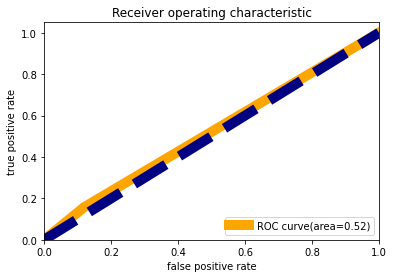

In [58]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(lr_test_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# MODEL SAVING 

In [59]:
import pickle
filename="HR_Analytics.pkl"
pickle.dump(lr,open(filename,"wb"))

# CONCLUSION

In [60]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_con=pd.DataFrame({"original":a,"Predicted":predicted})
df_con.head()

,original,Predicted
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0
